In this assignment you will build models to predict quality of wines.  Please review the data dictionary and data provenance here:

https://archive.ics.uci.edu/ml/datasets/wine+quality

The target variable has been recoded as 1 (quality > 6) and 0 (quality < 7)

1. Load the data
2. Explore the distribution of the target variable
3. Assess if there are any missing values
4. Explore the information value and distribution of features using the pairplot




In [21]:
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

In [79]:
wine_data = pd.read_csv('~/Desktop/Portfolio/rjparkk.github.io/Datasets/whitewine-classification.csv')
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  goodwine              4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [23]:
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,goodwine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [24]:
# Exploratory analysis
# Evaluate target variable distribution

wine_data.goodwine.mean()

0.21641486320947326

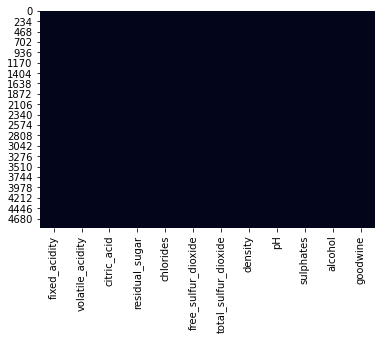

In [25]:
# Explore missing values

sns.heatmap(wine_data.isnull(), cbar=False)

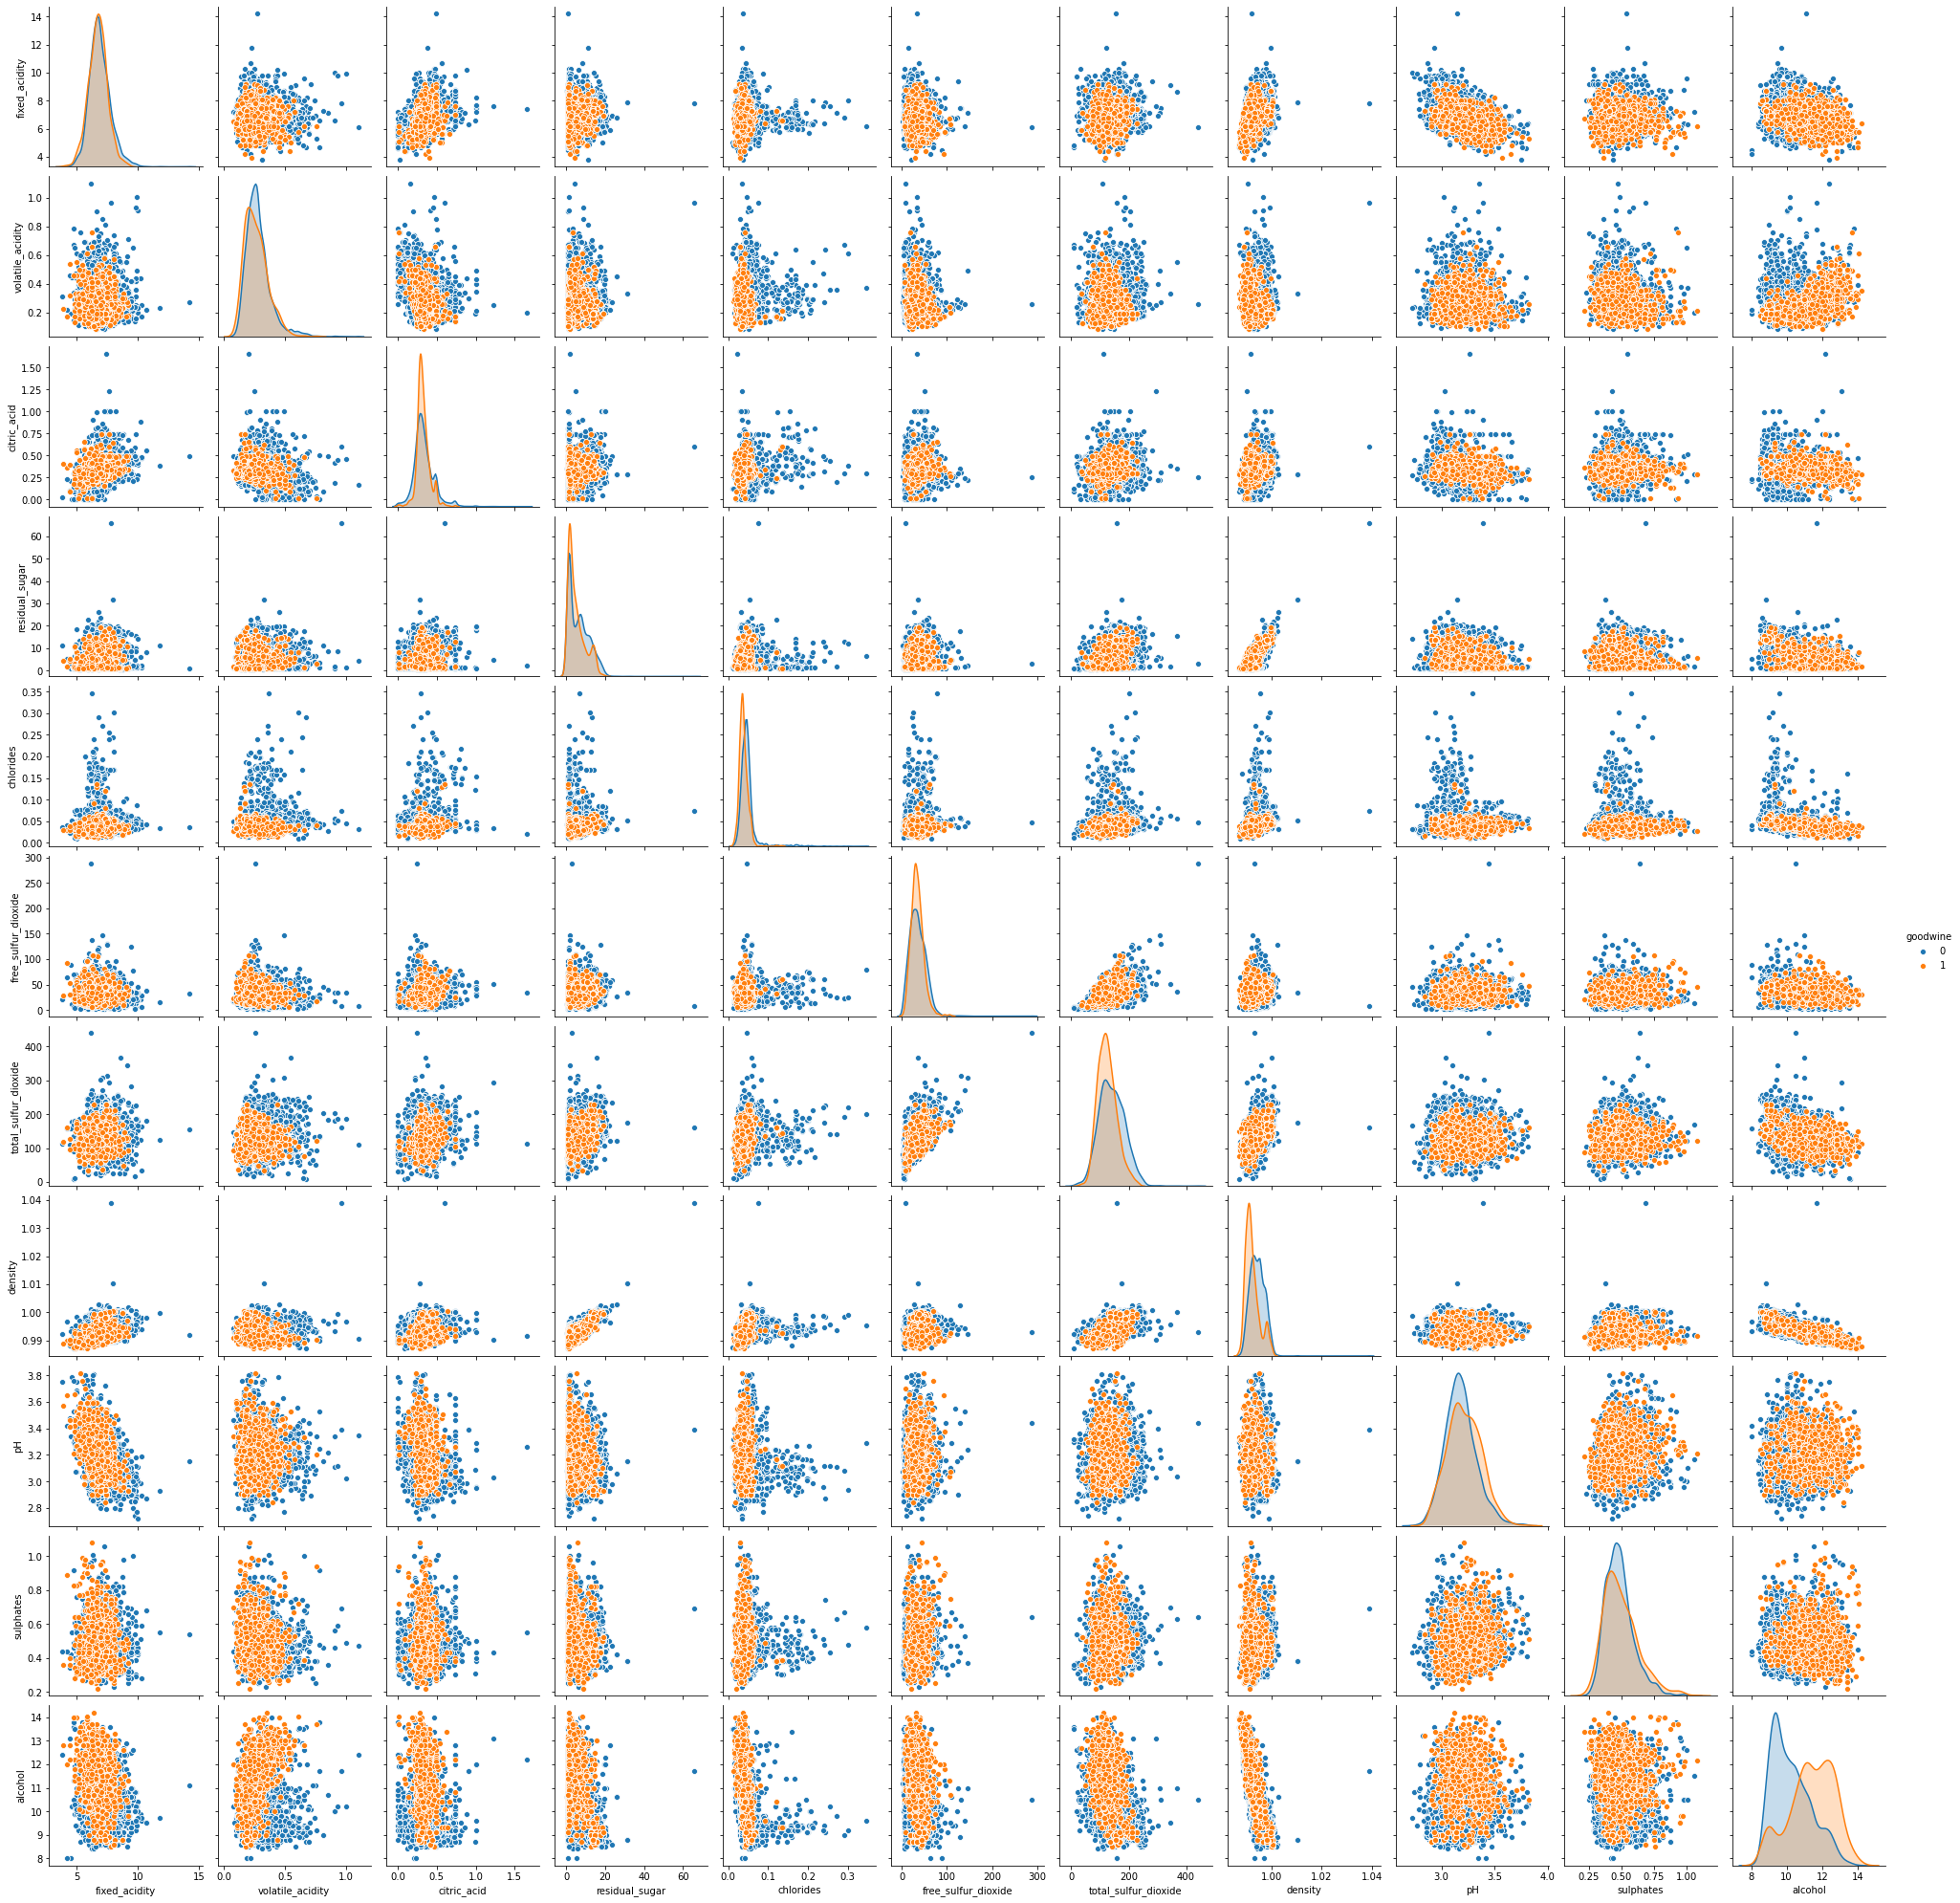

In [26]:
sns.pairplot(wine_data, hue = 'goodwine')

5. Develop logistic regression, kNN (optimize k), random forest and boosted tree models to predict wine quality. Make sure to preprocess the data as needed by the respective models.

6. Assess the performance of each model using the following metrics: Recall, Precision, F1, ROC AUC.  Which is the best model based on ROC AUC?



In [27]:
# Need to keep all dummy variables

wine_data = pd.get_dummies(wine_data)

In [28]:
X = wine_data.drop('goodwine', axis=1)
y = wine_data['goodwine']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Logistic Regression

In [106]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [107]:
wine_data = pd.read_csv('~/Desktop/Portfolio/rjparkk.github.io/Datasets/whitewine-classification.csv')
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  goodwine              4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [108]:
x = wine_data.drop('goodwine', axis=1)
y = wine_data['goodwine']

#Split data 70/30 into training and test datasets.

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [109]:
#Build a logistic regression model to predict goodwine

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [110]:
#Evaluate model performance.

y_pred = logmodel.predict(X_test)

In [111]:
y_test[:10]

2414    0
1584    0
3248    1
645     0
3163    1
4895    0
600     0
1379    0
1554    1
643     0
Name: goodwine, dtype: int64

In [112]:
y_pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [113]:
from sklearn.metrics import confusion_matrix, classification_report

#Display the confusion matrix.

confusion_matrix(y_test,y_pred)

array([[1087,   49],
       [ 255,   79]])

In [114]:
#Report the following metrics: ROC AUC, Accuracy, Recall, Precision


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1136
           1       0.62      0.24      0.34       334

    accuracy                           0.79      1470
   macro avg       0.71      0.60      0.61      1470
weighted avg       0.77      0.79      0.76      1470



In [115]:
logmodel.coef_

array([[-0.15301192, -2.80433802, -0.641572  ,  0.04242349, -1.39840283,
         0.01321608, -0.00486912, -3.60576489, -0.36733562,  0.93512438,
         0.79581535]])

In [116]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())



Optimization terminated successfully.
         Current function value: 0.423624
         Iterations 7
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.180      
Dependent Variable:    goodwine          AIC:               2926.3629  
Date:                  2021-05-10 19:57  BIC:               2993.8999  
No. Observations:      3428              Log-Likelihood:    -1452.2    
Df Model:              10                LL-Null:           -1769.9    
Df Residuals:          3417              LLR p-value:       4.3835e-130
Converged:             1.0000            Scale:             1.0000     
No. Iterations:        7.0000                                          
-----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------
fixed_acidity          0.0891   0.0679  1.3110 0.1898  -0.0441 

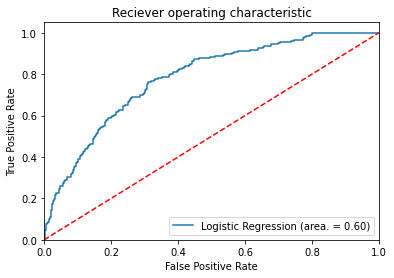

In [117]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

#Display the ROC curve

logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area. = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## KNN Model

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [119]:
wine_data = pd.read_csv('~/Desktop/Portfolio/rjparkk.github.io/Datasets/whitewine-classification.csv')
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  goodwine              4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [120]:
X = wine_data.drop('goodwine', axis=1)
y = wine_data[['goodwine']]
y = pd.get_dummies(y)

In [121]:
# MinMax Scalar transforms features into [0,1]
# Formula: X_rescaled = (Xi - Xmin) / (Xmax-Xmin) 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled= pd.DataFrame(X_, columns=X.columns)

In [122]:
X_rescaled.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.293730,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527
std,0.081141,0.098818,0.072903,0.077792,0.064831,0.059258,0.098603,0.057662,0.137273,0.132704,0.198487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088924,0.336364,0.220930,0.241935
50%,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097
75%,0.336538,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1028  108]
 [ 206  128]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1136
           1       0.54      0.38      0.45       334

    accuracy                           0.79      1470
   macro avg       0.69      0.64      0.66      1470
weighted avg       0.77      0.79      0.77      1470



## Random Forest Model

In [ ]:
X = wine_data.drop('goodwine', axis=1)
y = wine_data['goodwine']
y = pd.get_dummies(y)

In [30]:
dt_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)

dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [31]:
y_pred = dt_model.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

array([[1015,  121],
       [ 192,  142]])

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1136
           1       0.54      0.43      0.48       334

    accuracy                           0.79      1470
   macro avg       0.69      0.66      0.67      1470
weighted avg       0.77      0.79      0.78      1470



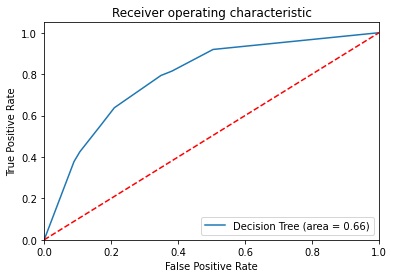

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


dt_roc_auc = roc_auc_score(y_test, dt_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

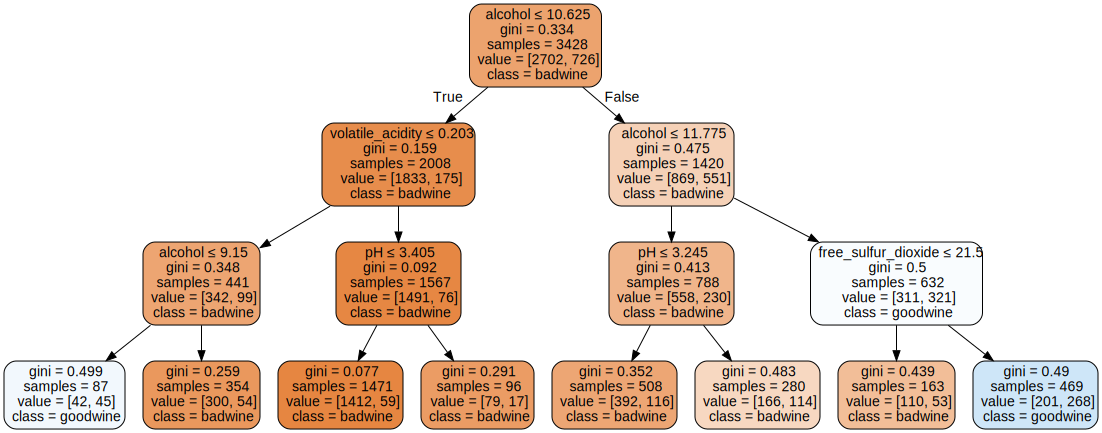

In [36]:
import graphviz 
dot_data = tree.export_graphviz(dt_model, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['badwine','goodwine'],
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


In [37]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

confusion_matrix(y_test,y_pred_rf)

array([[1107,   29],
       [ 242,   92]])

In [38]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1136
           1       0.76      0.28      0.40       334

    accuracy                           0.82      1470
   macro avg       0.79      0.62      0.65      1470
weighted avg       0.81      0.82      0.78      1470



In [39]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [40]:
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.1min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=5,
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [46]:
print(classification_report(y_test, rf_random.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1136
           1       0.82      0.59      0.68       334

    accuracy                           0.88      1470
   macro avg       0.85      0.77      0.80      1470
weighted avg       0.87      0.88      0.87      1470



In [47]:
# Boosted tree model

from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,y_train)

y_pred_bt = bt_model.predict(X_test)

confusion_matrix(y_test,y_pred_bt)

array([[1049,   87],
       [ 175,  159]])

In [48]:
print(classification_report(y_test,y_pred_bt))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1136
           1       0.65      0.48      0.55       334

    accuracy                           0.82      1470
   macro avg       0.75      0.70      0.72      1470
weighted avg       0.81      0.82      0.81      1470



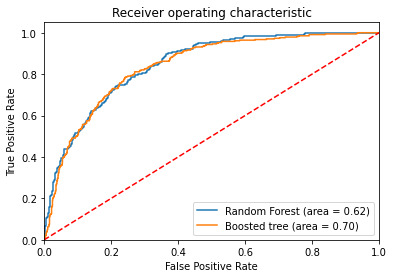

In [49]:
# Random Forest 
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

# Boosted Tree
bt_roc_auc = roc_auc_score(y_test, bt_model.predict(X_test))
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The precision measure looks at the model's ability to not label an instance as a positive, when it is actually a negative.  The precision of the RF model and Boosted model has a macro average of 85% and 75%, respectively. This means the RF model did a better job at accurately classifying an instance, than the boosted the model. 


The recall measure indicates the number of positives cases that each model were able to catch.  The recall of the RF model and Boosted Model, came to 77% and 70%, respectively. The RF Model had a higher recall than the Boosted model, meaning it had a higher percentage of capturing the number of positive cases within the model.

The F1 score looks at the percentage of how many positive cases were correctly labeled. The F1 score of the RF model and Boosted Model came to about 88% and 82%, respectively. Though only by small difference, the RF model had a higher accuracy than the Boosted Model.

Overall, looking at the ROC AUC, which indicates the model's capabilities to distinguish between each class, the RF ROC AUC was about 62% and the Boosted Tree model was about 70%. Thus, we can say the boosted tree model is the better model (thought not by much) at distinguishing its classes. 